## Importación de librerías y datos

In [1]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt 
from watson_developer_cloud import PersonalityInsightsV3




In [2]:
ensayosData = pd.read_excel(r'DataSets/muestra_total_profesional.xlsx')

In [3]:
ensayosData.head()

,X1,ARROBA,N00,TERM,EXPERIENCIA,METAS,P1,DEPORTIVAS,DEPORTIVAS_ACTU,P2,...,Foraneo,%Beca,Inglés,DIng3y4,DIng5y6,DLengExt,DTEC,FTE,Ensayo,Curriculo
0,9398,@03183694,N00645047,201813,Cuando cumplí 15 años estaba ansiosa por conoc...,Me veo en un futuro como una profesionista exi...,b,Soy parte del equipo de futbol en mi escuela I...,S,b,...,NO,60.000000,Lengua extranjera,0,0,1,0,1.153846,25,15
1,895,@02548142,N00638635,201813,Considero que el baloncesto es la experiencia ...,Considero que puedo aportar a la comunidad est...,d,He obtenido varios logros en el baloncesto gra...,S,a,...,NO,100.000000,Inglés remedial III,1,0,0,0,0.846154,19,25
2,3546,@02840940,N00597655,201813,Aunque durante toda mi vida escolar he trabaja...,Quiero ser Ingeniero Mecatronico porque quiero...,b,En el Instituto Cumbres Piedras Negras he part...,S,b,...,NO,15.000989,Sin información,0,0,0,0,0.692308,15,15
3,2815,@02829415,N00591191,201813,"Experiencia de vidaMi colegio, el Instituto Cu...",CompromisoDesde que comencé mi vida estudianti...,c,"He participado en 2 Torneos de la Amistad, com...",S,a,...,NO,59.999829,Sin información,0,0,0,0,1.000000,25,25
4,390,@02459560,N00556452,201813,'Un cuerpo pequeño de espíritu determinado enc...,"'Vive como si fueras a morir mañana, aprende c...",b,En mi transcurso de la primer en el nivel depo...,S,b,...,NO,20.000863,Inglés remedial IV,1,0,0,0,1.000000,6,15


## Mi URL y API Key de IBM Personality Insights

In [4]:
url = "https://gateway.watsonplatform.net/personality-insights/api"
apiKey = "ZqrQk-aL10JeAWI-5ji2JqIS8s63h42CWuXDcG2wwFxy"

## Creación de un servicio de personality insights

In [5]:
service = PersonalityInsightsV3(url=url, version='2017-10-13', iam_apikey=apiKey)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  """Entry point for launching an IPython kernel.


## Concatenación de los textos en una sola columna para cada registro

In [6]:
ensayosData['essayConcat'] = ensayosData.EXPERIENCIA + ensayosData.METAS + ensayosData.DEPORTIVAS + ensayosData.CULTURALES + ensayosData.ESTUDIANTIL + ensayosData.COMUNITARIO + ensayosData.LIDERAZGO + ensayosData.LABORAL + ensayosData.LOGROS_ACAD
 

In [7]:
firstEssay = ensayosData.essayConcat[0]

## Creación de un perfil con personality insights y resultados de haberlo aplicado al primer registro de la BD

In [8]:
profile = service.profile(firstEssay, content_type='text/plain').get_result()

In [9]:
print(json.dumps(profile, indent=2))

{
  "word_count": 1267,
  "processed_language": "en",
  "personality": [
    {
      "trait_id": "big5_openness",
      "name": "Openness",
      "category": "personality",
      "percentile": 0.34932650490263695,
      "significant": true,
      "children": [
        {
          "trait_id": "facet_adventurousness",
          "name": "Adventurousness",
          "category": "personality",
          "percentile": 0.3494224513383936,
          "significant": true
        },
        {
          "trait_id": "facet_artistic_interests",
          "name": "Artistic interests",
          "category": "personality",
          "percentile": 0.6310389525364467,
          "significant": true
        },
        {
          "trait_id": "facet_emotionality",
          "name": "Emotionality",
          "category": "personality",
          "percentile": 0.5100805087568621,
          "significant": true
        },
        {
          "trait_id": "facet_imagination",
          "name": "Imagination",
     

## Visualización del perfil 

In [10]:
result = {need['name']:need['percentile'] for need in profile['needs']}

In [11]:
df = pd.DataFrame.from_dict(result,orient='index')

In [12]:
df.reset_index(inplace=True)

### Necesidades

In [13]:
df.columns = ['need','percentile']

In [102]:
df

,need,percentile
0,Challenge,0.275636
1,Closeness,0.339228
2,Curiosity,0.361243
3,Excitement,0.391967
4,Harmony,0.266920
5,Ideal,0.326225
6,Liberty,0.351781
7,Love,0.420682
8,Practicality,0.465031
9,Self-expression,0.328331


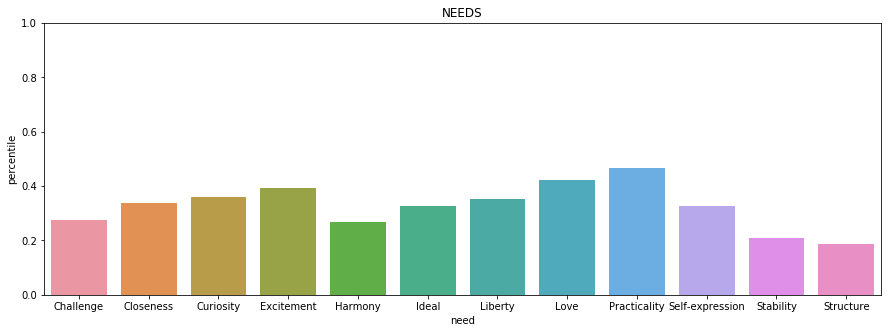

In [44]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_ylim([0,1])
sns.barplot(y='percentile', x='need', data = df).set_title("NEEDS")
plt.show()
#plt.bar(df.need,df.percentile)


In [118]:
def create_trait_plots(traits):
    result = { trait['name']:trait['percentile'] for trait in traits}
    df = pd.DataFrame.from_dict(result, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['name','percentile']
    print(df)
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    ax.set_ylim([0,1])
    sns.barplot(y='percentile',x='name',data=df).set_title(str(traits[0]['category']).upper())
    plt.show()

### Valores

                 name  percentile
0        Conservation    0.184719
1  Openness to change    0.454873
2            Hedonism    0.515322
3    Self-enhancement    0.355526
4  Self-transcendence    0.105406


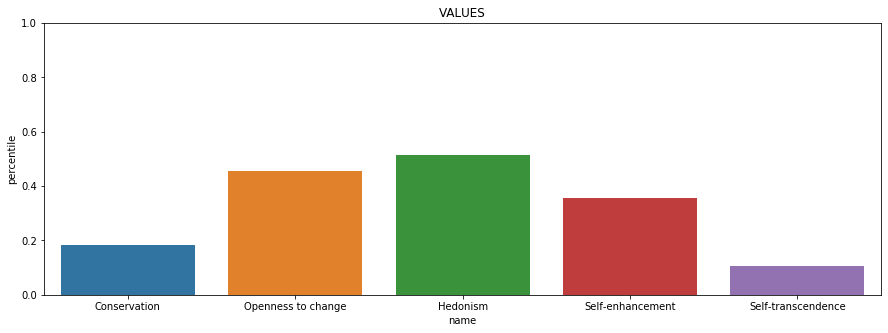

In [119]:
create_trait_plots(profile['values'])

In [120]:
def create_trait_plots(traits,parent):
    result = { trait['name']:trait['percentile'] for trait in traits}
    df = pd.DataFrame.from_dict(result, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['name','percentile']
    print(df)
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    ax.set_ylim([0,1])
    sns.barplot(y='percentile',x='name',data=df).set_title(str(parent['name']).upper())
    plt.show()

### Las big5 (5 grandes razgos de personalidad)

                    name  percentile
0        Adventurousness    0.349422
1     Artistic interests    0.631039
2           Emotionality    0.510081
3            Imagination    0.681635
4              Intellect    0.770503
5  Authority-challenging    0.851189


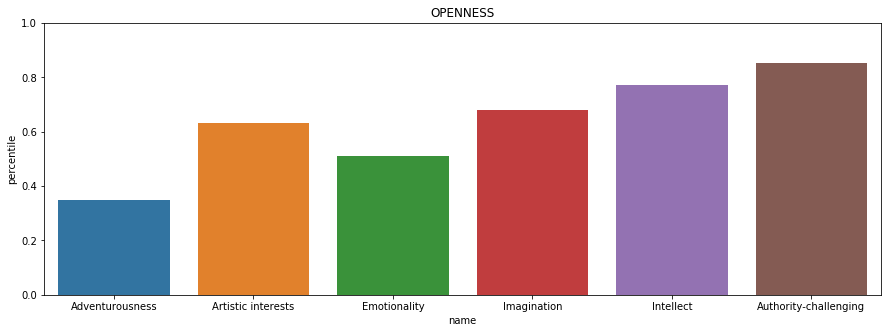

                   name  percentile
0  Achievement striving    0.254954
1          Cautiousness    0.390870
2           Dutifulness    0.058204
3           Orderliness    0.459133
4       Self-discipline    0.228952
5         Self-efficacy    0.401595


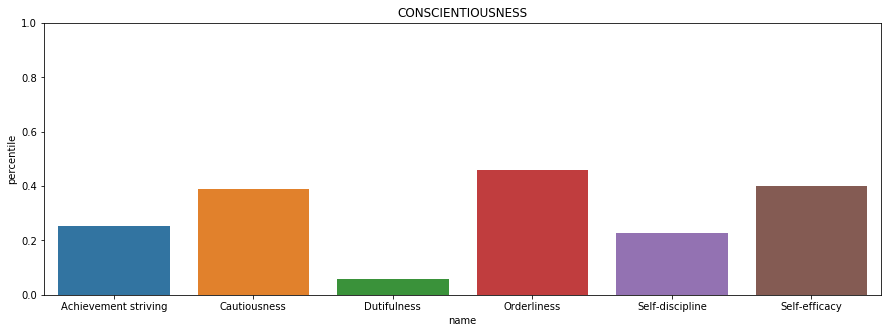

                 name  percentile
0      Activity level    0.389565
1       Assertiveness    0.428834
2        Cheerfulness    0.306608
3  Excitement-seeking    0.980274
4            Outgoing    0.309660
5      Gregariousness    0.417761


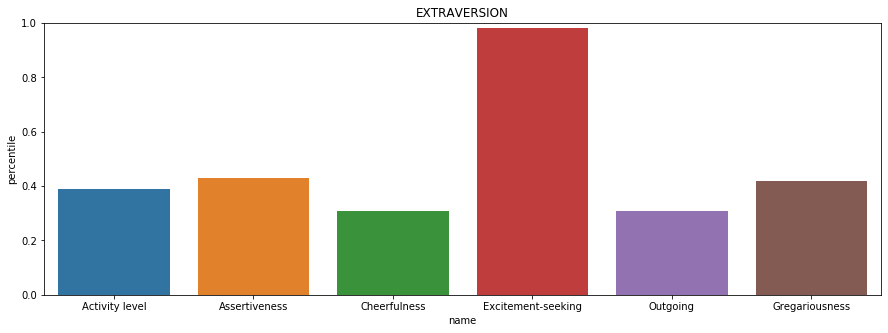

             name  percentile
0        Altruism    0.434645
1     Cooperation    0.306881
2         Modesty    0.522738
3  Uncompromising    0.344688
4        Sympathy    0.613332
5           Trust    0.373800


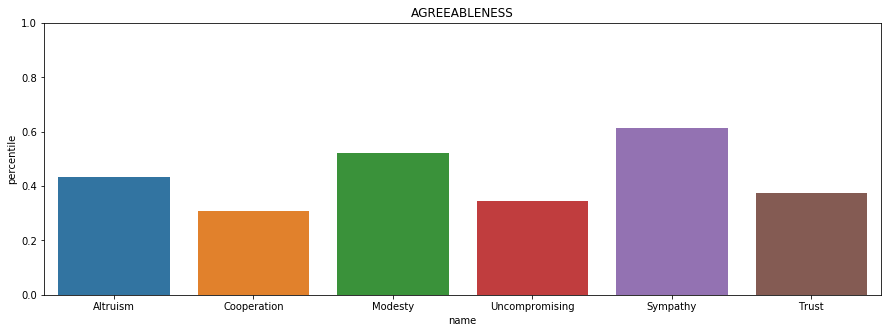

                    name  percentile
0                  Fiery    0.584314
1         Prone to worry    0.729463
2             Melancholy    0.800744
3           Immoderation    0.742815
4     Self-consciousness    0.722717
5  Susceptible to stress    0.698580


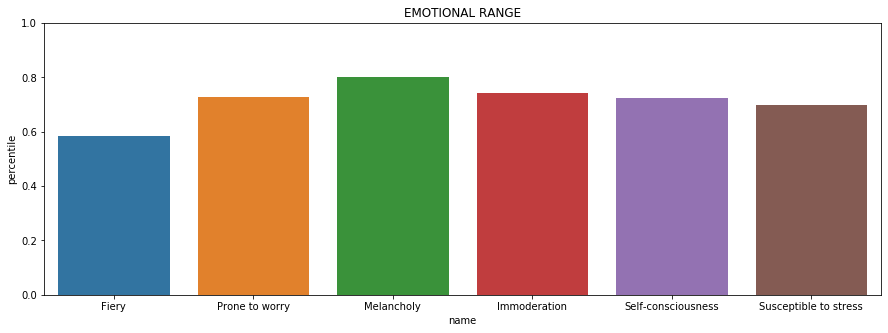

[None, None, None, None, None]

In [121]:
[create_trait_plots(big5['children'],big5) for big5 in profile['personality']]